## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  61.472282  1704.780644  0.923980  8.949337  1576.196278
1  50.477726  1360.491559  0.045251  9.842237    79.557508
2  40.215410  1043.470692  0.447228  6.649379   468.443089
3  83.646161   650.624239  0.402087  8.901004   274.589185
4  66.489689   552.783447  0.120550  1.820496    94.080650


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9207857	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9102405	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9002004	total: 58.9ms	remaining: 19.6s
3:	learn: 0.8879932	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8745174	total: 59.8ms	remaining: 11.9s
5:	learn: 0.8618881	total: 60.2ms	remaining: 9.98s
6:	learn: 0.8495738	total: 60.8ms	remaining: 8.62s
7:	learn: 0.8379369	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8254590	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8129091	total: 62.2ms	remaining: 6.15s
10:	learn: 0.8030060	total: 62.5ms	remaining: 5.62s
11:	learn: 0.7897732	total: 62.9ms	remaining: 5.18s
12:	learn: 0.7791252	total: 63.4ms	remaining: 4.81s
13:	learn: 0.7672875	total: 63.8ms	remaining: 4.49s
14:	learn: 0.7573463	total: 64.3ms	remaining: 4.22s
15:	learn: 0.7478202	total: 64.9ms	remaining: 3.99s
16:	learn: 0.7377879	total: 65.5ms	remaining: 3.78s
17:	learn: 0.7278522	total: 65.9ms	remaining: 3.6s
18:	learn: 0.7202318	total: 66.3ms	remaining:

111:	learn: 0.2295073	total: 109ms	remaining: 865ms
112:	learn: 0.2274244	total: 110ms	remaining: 860ms
113:	learn: 0.2249140	total: 110ms	remaining: 854ms
114:	learn: 0.2223959	total: 110ms	remaining: 849ms
115:	learn: 0.2206270	total: 111ms	remaining: 844ms
116:	learn: 0.2182983	total: 111ms	remaining: 839ms
117:	learn: 0.2162739	total: 112ms	remaining: 835ms
118:	learn: 0.2139435	total: 112ms	remaining: 830ms
119:	learn: 0.2122504	total: 112ms	remaining: 825ms
120:	learn: 0.2099987	total: 113ms	remaining: 819ms
121:	learn: 0.2077744	total: 113ms	remaining: 815ms
122:	learn: 0.2055560	total: 114ms	remaining: 810ms
123:	learn: 0.2034117	total: 114ms	remaining: 807ms
124:	learn: 0.2010432	total: 115ms	remaining: 802ms
125:	learn: 0.1987975	total: 115ms	remaining: 797ms
126:	learn: 0.1962801	total: 115ms	remaining: 793ms
127:	learn: 0.1940947	total: 116ms	remaining: 789ms
128:	learn: 0.1920664	total: 116ms	remaining: 784ms
129:	learn: 0.1901082	total: 117ms	remaining: 780ms
130:	learn: 

289:	learn: 0.0574489	total: 186ms	remaining: 456ms
290:	learn: 0.0572264	total: 187ms	remaining: 455ms
291:	learn: 0.0569028	total: 188ms	remaining: 455ms
292:	learn: 0.0566608	total: 188ms	remaining: 454ms
293:	learn: 0.0564005	total: 188ms	remaining: 452ms
294:	learn: 0.0560539	total: 189ms	remaining: 451ms
295:	learn: 0.0558206	total: 189ms	remaining: 451ms
296:	learn: 0.0554572	total: 190ms	remaining: 450ms
297:	learn: 0.0552022	total: 190ms	remaining: 449ms
298:	learn: 0.0549864	total: 191ms	remaining: 448ms
299:	learn: 0.0546543	total: 191ms	remaining: 447ms
300:	learn: 0.0543159	total: 192ms	remaining: 445ms
301:	learn: 0.0539926	total: 192ms	remaining: 445ms
302:	learn: 0.0536276	total: 193ms	remaining: 444ms
303:	learn: 0.0532571	total: 193ms	remaining: 443ms
304:	learn: 0.0530340	total: 194ms	remaining: 442ms
305:	learn: 0.0527175	total: 194ms	remaining: 440ms
306:	learn: 0.0523973	total: 195ms	remaining: 439ms
307:	learn: 0.0521658	total: 195ms	remaining: 438ms
308:	learn: 

523:	learn: 0.0240088	total: 291ms	remaining: 264ms
524:	learn: 0.0239103	total: 291ms	remaining: 264ms
525:	learn: 0.0238130	total: 292ms	remaining: 263ms
526:	learn: 0.0237649	total: 292ms	remaining: 262ms
527:	learn: 0.0236728	total: 293ms	remaining: 262ms
528:	learn: 0.0236257	total: 293ms	remaining: 261ms
529:	learn: 0.0235325	total: 293ms	remaining: 260ms
530:	learn: 0.0234893	total: 294ms	remaining: 260ms
531:	learn: 0.0233997	total: 294ms	remaining: 259ms
532:	learn: 0.0232753	total: 295ms	remaining: 258ms
533:	learn: 0.0232296	total: 295ms	remaining: 258ms
534:	learn: 0.0231875	total: 296ms	remaining: 257ms
535:	learn: 0.0231006	total: 296ms	remaining: 256ms
536:	learn: 0.0230560	total: 296ms	remaining: 256ms
537:	learn: 0.0229671	total: 297ms	remaining: 255ms
538:	learn: 0.0228733	total: 297ms	remaining: 254ms
539:	learn: 0.0228296	total: 298ms	remaining: 253ms
540:	learn: 0.0227454	total: 298ms	remaining: 253ms
541:	learn: 0.0227048	total: 298ms	remaining: 252ms
542:	learn: 

708:	learn: 0.0146947	total: 368ms	remaining: 151ms
709:	learn: 0.0146745	total: 369ms	remaining: 151ms
710:	learn: 0.0146431	total: 369ms	remaining: 150ms
711:	learn: 0.0145882	total: 369ms	remaining: 149ms
712:	learn: 0.0145721	total: 370ms	remaining: 149ms
713:	learn: 0.0145420	total: 370ms	remaining: 148ms
714:	learn: 0.0145128	total: 371ms	remaining: 148ms
715:	learn: 0.0144678	total: 371ms	remaining: 147ms
716:	learn: 0.0144393	total: 371ms	remaining: 147ms
717:	learn: 0.0144116	total: 372ms	remaining: 146ms
718:	learn: 0.0143586	total: 372ms	remaining: 145ms
719:	learn: 0.0143316	total: 372ms	remaining: 145ms
720:	learn: 0.0143005	total: 373ms	remaining: 144ms
721:	learn: 0.0142702	total: 373ms	remaining: 144ms
722:	learn: 0.0142237	total: 374ms	remaining: 143ms
723:	learn: 0.0141719	total: 374ms	remaining: 143ms
724:	learn: 0.0141534	total: 374ms	remaining: 142ms
725:	learn: 0.0141434	total: 375ms	remaining: 142ms
726:	learn: 0.0141228	total: 375ms	remaining: 141ms
727:	learn: 

940:	learn: 0.0086570	total: 473ms	remaining: 29.6ms
941:	learn: 0.0086287	total: 473ms	remaining: 29.1ms
942:	learn: 0.0085993	total: 473ms	remaining: 28.6ms
943:	learn: 0.0085727	total: 474ms	remaining: 28.1ms
944:	learn: 0.0085499	total: 474ms	remaining: 27.6ms
945:	learn: 0.0085219	total: 475ms	remaining: 27.1ms
946:	learn: 0.0084944	total: 475ms	remaining: 26.6ms
947:	learn: 0.0084839	total: 475ms	remaining: 26.1ms
948:	learn: 0.0084565	total: 476ms	remaining: 25.6ms
949:	learn: 0.0084306	total: 476ms	remaining: 25.1ms
950:	learn: 0.0084033	total: 477ms	remaining: 24.6ms
951:	learn: 0.0083765	total: 477ms	remaining: 24ms
952:	learn: 0.0083693	total: 477ms	remaining: 23.5ms
953:	learn: 0.0083590	total: 478ms	remaining: 23ms
954:	learn: 0.0083286	total: 478ms	remaining: 22.5ms
955:	learn: 0.0083020	total: 479ms	remaining: 22ms
956:	learn: 0.0082721	total: 479ms	remaining: 21.5ms
957:	learn: 0.0082458	total: 480ms	remaining: 21ms
958:	learn: 0.0082196	total: 480ms	remaining: 20.5ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

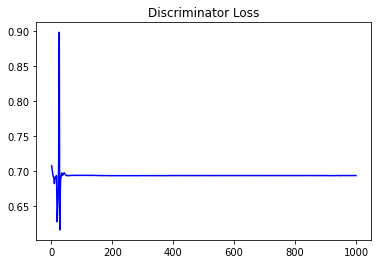

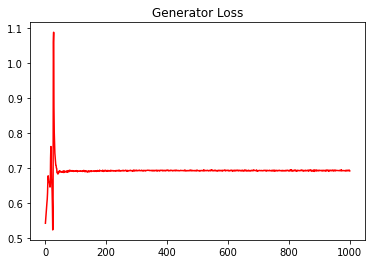

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02552319177240923


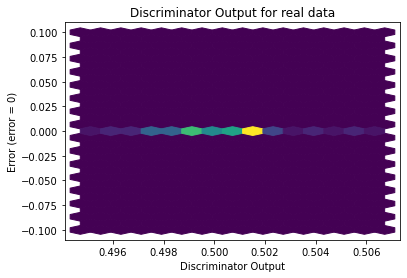

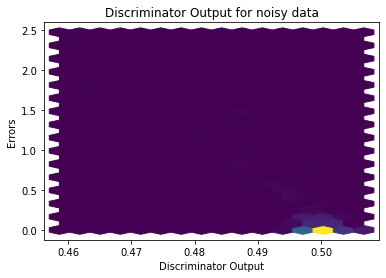

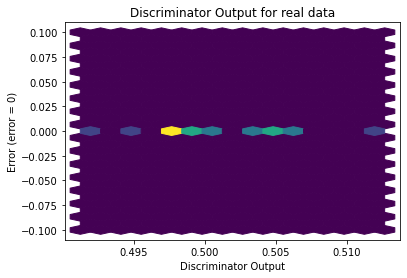

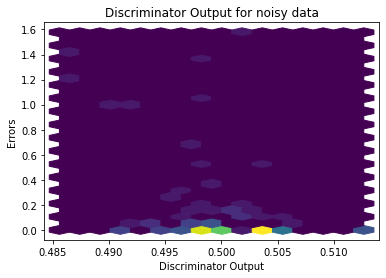

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


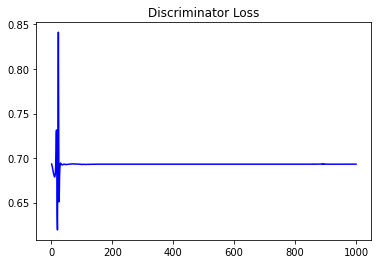

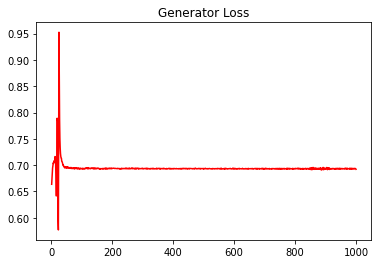

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.021843745792501673


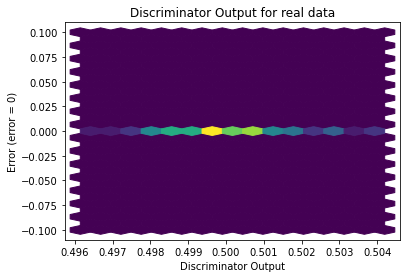

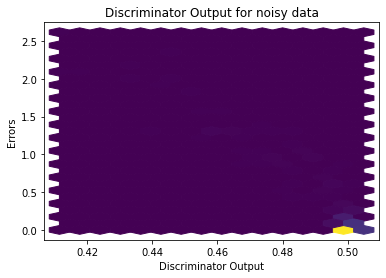

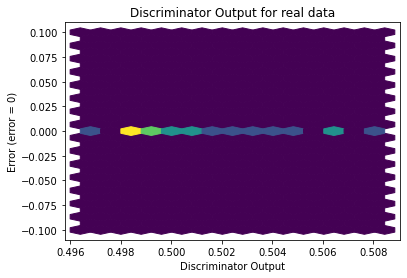

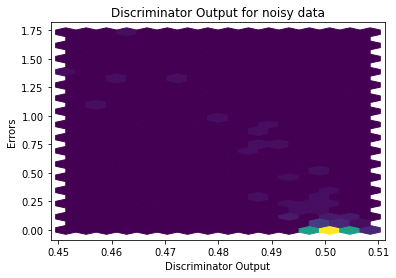

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5250]], requires_grad=True)
